In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the CSV file
gempa_data = pd.read_csv('Gempa_Cianjur.csv')

In [3]:
# Read info
print(gempa_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              360 non-null    int64 
 1   kode_provinsi                   360 non-null    int64 
 2   nama_provinsi                   360 non-null    object
 3   bps_kode_kabupaten_kota         360 non-null    int64 
 4   bps_nama_kabupaten_kota         360 non-null    object
 5   bps_kode_kecamatan              360 non-null    int64 
 6   bps_nama_kecamatan              360 non-null    object
 7   bps_kode_desa_kelurahan         360 non-null    int64 
 8   bps_nama_desa_kelurahan         360 non-null    object
 9   kemendagri_kode_kecamatan       360 non-null    object
 10  kemendagri_nama_kecamatan       360 non-null    object
 11  kemendagri_kode_desa_kelurahan  360 non-null    object
 12  kemendagri_nama_desa_kelurahan  360 non-null    ob

In [4]:
# Hitung jumlah Gempa Cianjur berdasarkan dataset
total_earthquakes = gempa_data['jumlah_gempa_bumi'].sum()

In [5]:
print(f'Jumlah Gempa Cianjur berdasarkan dataset: {total_earthquakes}')

Jumlah Gempa Cianjur berdasarkan dataset: 155


In [6]:
# Mengelompokkan data berdasarkan kecamatan dan desa kelurahan
gempa_data = gempa_data.rename(columns={'bps_nama_kecamatan': 'Kecamatan', 'bps_nama_desa_kelurahan': 'Kelurahan'})
earthquakes_by_location = gempa_data.groupby(['Kecamatan', 'Kelurahan'])['jumlah_gempa_bumi'].sum().reset_index()

In [7]:
# Menampilkan persebaran gempa bumi
print('Persebaran Gempa:')
print()
print(earthquakes_by_location.to_string(index=False))

Persebaran Gempa:

    Kecamatan        Kelurahan  jumlah_gempa_bumi
    AGRABINTA       BOJONGKASO                  0
    AGRABINTA         BUNISARI                  0
    AGRABINTA       KARANGSARI                  0
    AGRABINTA        MEKARSARI                  0
    AGRABINTA        MULYASARI                  0
    AGRABINTA        NEGLASARI                  0
    AGRABINTA        SINARLAUT                  0
    AGRABINTA        SUKAMANAH                  0
    AGRABINTA      TANJUNGSARI                  0
    AGRABINTA         WANASARI                  0
    AGRABINTA       WANGUNJAYA                  0
 BOJONGPICUNG     BOJONGPICUNG                  1
 BOJONGPICUNG      CIBARENGKOK                  1
 BOJONGPICUNG        CIKONDANG                  1
 BOJONGPICUNG       HEGARMANAH                  1
 BOJONGPICUNG             JATI                  1
 BOJONGPICUNG         JATISARI                  1
 BOJONGPICUNG           KEMANG                  1
 BOJONGPICUNG        NEGLASARI 

In [8]:
# Mengelompokkan data berdasarkan kecamatan dan menghitung jumlah gempa bumi untuk setiap kecamatan
earthquakes_by_kecamatan = gempa_data.groupby('Kecamatan')['jumlah_gempa_bumi'].sum().reset_index()

In [9]:
# Membuat DataFrame dari hasil pengelompokkan
df = pd.DataFrame(earthquakes_by_kecamatan)

In [10]:
# Menampilkan pesan "Jumlah Gempa Bumi per Kecamatan:"
print("Jumlah Gempa per Kecamatan:")
print()
print(df.to_string(index=False))

Jumlah Gempa per Kecamatan:

    Kecamatan  jumlah_gempa_bumi
    AGRABINTA                  0
 BOJONGPICUNG                 11
      CAMPAKA                  0
 CAMPAKAMULYA                  0
      CIANJUR                 11
      CIBEBER                  3
     CIBINONG                  0
       CIDAUN                  0
       CIJATI                  0
       CIKADU                  0
CIKALONGKULON                 10
       CILAKU                 10
      CIPANAS                  7
    CIRANJANG                  8
     CUGENANG                 16
     GEKBRONG                  8
    HAURWANGI                  2
   KADUPANDAK                  0
 KARANGTENGAH                 16
        LELES                  0
        MANDE                 12
    NARINGGUL                  0
        PACET                  7
    PAGELARAN                  0
    PASIRKUDA                  0
SINDANGBARANG                  2
     SUKALUYU                 10
   SUKANAGARA                  0
    SUKARESMI 

In [11]:
# gunakan tema Seaborn
sns.set_theme()

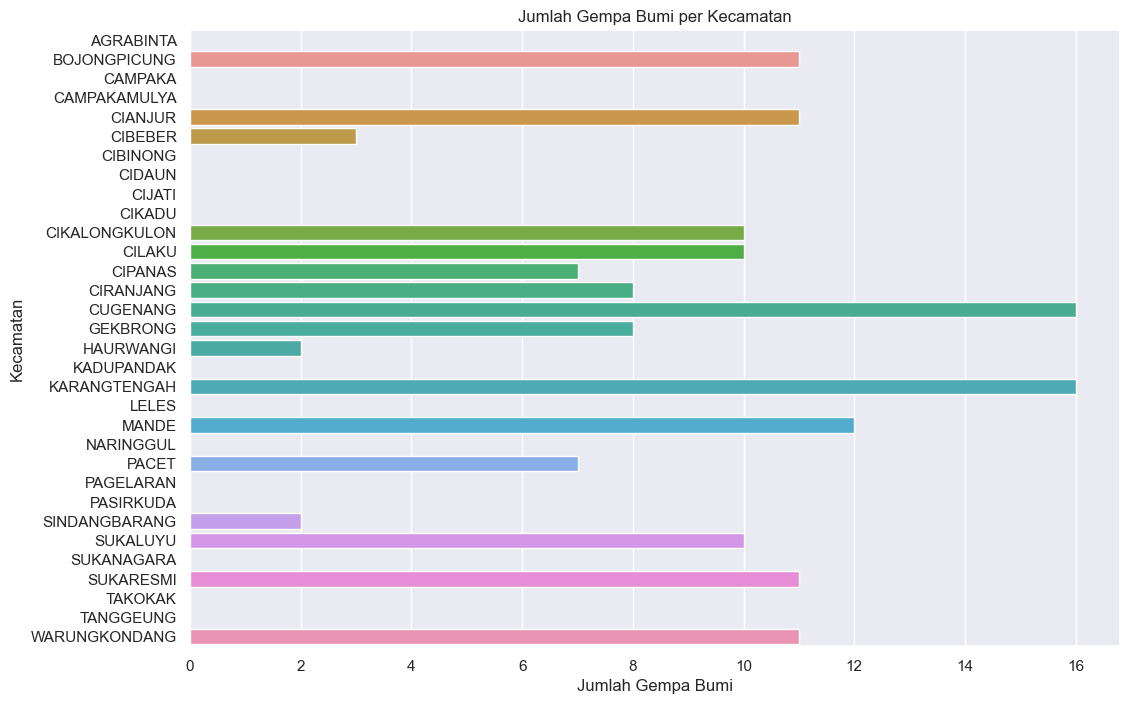

In [12]:
# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='jumlah_gempa_bumi', y='Kecamatan')
plt.title('Jumlah Gempa Bumi per Kecamatan')
plt.xlabel('Jumlah Gempa Bumi')
plt.ylabel('Kecamatan')
plt.show()

In [13]:
# Menghitung total gempa bumi untuk setiap kecamatan dan kelurahan
total_earthquakes_by_kecamatan = earthquakes_by_location.groupby('Kecamatan')['jumlah_gempa_bumi'].sum()
total_earthquakes_by_kelurahan = earthquakes_by_location.groupby('Kelurahan')['jumlah_gempa_bumi'].sum()

In [14]:
# Menemukan kecamatan dan kelurahan dengan jumlah gempa bumi tertinggi
dominant_kecamatan = total_earthquakes_by_kecamatan.idxmax()
max_earthquakes_in_kecamatan = total_earthquakes_by_kecamatan.max()
dominant_kelurahan = total_earthquakes_by_kelurahan.idxmax()
max_earthquakes_in_kelurahan = total_earthquakes_by_kelurahan.max()

In [15]:
print("Daerah yang paling Terdampak")
print()
print(f"Kecamatan: {dominant_kecamatan}, jumlah Gempa: {max_earthquakes_in_kecamatan}")
print(f"Kelurahan: {dominant_kelurahan}, jumlah Gempa: {max_earthquakes_in_kelurahan}")

Daerah yang paling Terdampak

Kecamatan: CUGENANG, jumlah Gempa: 16
Kelurahan: SUKAMULYA, jumlah Gempa: 4
